In [1]:
from scenario_run import ScenarioRunner
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Set up paths
DIR_PATH = os.getcwd()
CONFIG_DIR_PATH = os.path.join(DIR_PATH, "config")
OUTPUT_DIR_PATH = os.path.join(DIR_PATH, "output")
FIGURES_DIR_PATH = os.path.join(OUTPUT_DIR_PATH, "figures")
SCENARIO_SIM_RESULTS_DIR_PATH = os.path.join(OUTPUT_DIR_PATH, "scenario_results")

In [4]:
# Get the yaml files with 'mty' in the file name from the config directory
yaml_files = [f for f in os.listdir(CONFIG_DIR_PATH) if f.endswith('.yaml') and 'mty' in f]
if not yaml_files:
    raise FileNotFoundError("No YAML file with 'mty' in the name found in the config directory.")

# remove .yaml extension from the file name
yaml_files = [f.replace('.yaml', '') for f in yaml_files]
yaml_files


['well_financed_mty',
 'proximate_mty',
 'reconceived_mty',
 'baseline_mty',
 'efficient_mty']

In [5]:
# Run the scenario simulations
for yaml_file in yaml_files:
    print(f"Running scenario simulation for {yaml_file}...")
    scenario_runner = ScenarioRunner(yaml_file)
    scenario_runner.run()

Running scenario simulation for well_financed_mty...
Running scenario simulation for proximate_mty...
Running scenario simulation for reconceived_mty...
Running scenario simulation for baseline_mty...
Running scenario simulation for efficient_mty...


In [6]:
relevant_ouput_fields = [
    "city_sprawl",
    "time_in_traffic",
    "access_to_services",
    "rent_cost",
    "proximity_index",
    "houses"
]

In [7]:
# Go to scenario results directory and read the CSV files, store them in a dict of dataframes
os.chdir(SCENARIO_SIM_RESULTS_DIR_PATH)
csv_files = [f for f in os.listdir() if f.endswith('.csv')]
if not csv_files:
    raise FileNotFoundError("No CSV files found in the scenario results directory.")
scenario_data = {}
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    # Remove 'scenario_sim_results_' prefix and '.csv' extension for the key
    scenario_name = csv_file.replace('scenario_sim_results_', '').replace('.csv', '')
    scenario_data[scenario_name] = df

scenario_data.keys()

dict_keys(['reconceived_mty', 'proximate_mty', 'baseline_mty', 'efficient_mty', 'well_financed_mty'])

In [8]:
import math

def plot_time_series_subplots(df, fields, title=None, figsize=(12, 2.5)):
    """
    Plots time series subplots for the given fields from the dataframe in two columns.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        fields (list): List of column names to plot.
        title (str, optional): Title for the figure.
        figsize (tuple, optional): Size of each subplot (width, height).
    """
    n = len(fields)
    ncols = 2
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(figsize[0], figsize[1]*nrows), sharex=True)
    axes = axes.flatten()
    for i, field in enumerate(fields):
        axes[i].plot(df['time'], df[field])
        axes[i].set_ylabel(field)
        axes[i].grid(True, linestyle='--', alpha=0.5)
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    axes[-1].set_xlabel('time')
    if title:
        fig.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.97] if title else None)
    plt.show()

In [13]:
def plot_time_series_subplots_compare(scenario_dfs, fields, title=None, figsize=(8, 3)):
    """
    Plots time series subplots for the given fields, comparing multiple dataframes in a single column.

    Parameters:
        scenario_dfs (dict): Dict of {label: pd.DataFrame} to compare.
        fields (list): List of column names to plot.
        title (str, optional): Title for the figure.
        figsize (tuple, optional): Size of each subplot (width, height).
    """
    n = len(fields)
    ncols = 1
    nrows = n
    fig, axes = plt.subplots(nrows, ncols, figsize=(figsize[0], figsize[1]*nrows), sharex=True)
    if n == 1:
        axes = [axes]
    for i, field in enumerate(fields):
        for label, df in scenario_dfs.items():
            axes[i].plot(df['time'], df[field], label=label)
        axes[i].set_ylabel(field)
        axes[i].grid(True, linestyle='--', alpha=0.5)
        axes[i].legend()
    axes[-1].set_xlabel('time')
    if title:
        fig.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.97] if title else None)
    plt.show()
    plt.close(fig)


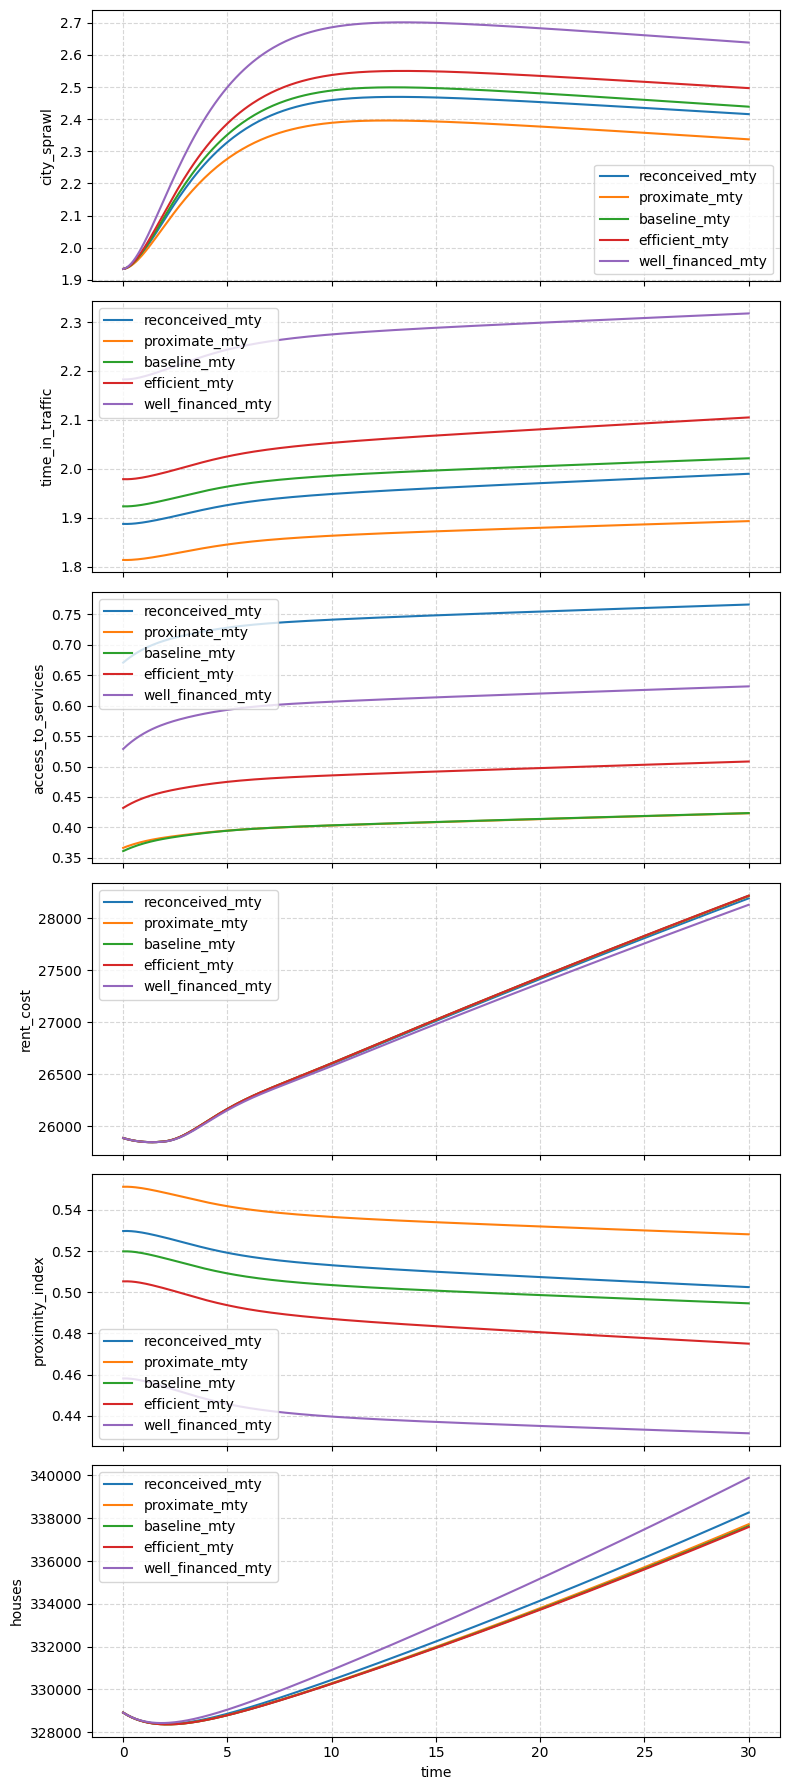

In [14]:
plot_time_series_subplots_compare(scenario_data, relevant_ouput_fields)

In [12]:
# for scenario_name, df in scenario_data.items():
#     # print(f"Plotting time series for scenario: {scenario_name}")
#     plot_time_series_subplots(df, relevant_ouput_fields, title=scenario_name, figsize=(12, 2.5))
#     plt.close()  # Close the figure to free memory